In [1]:
import numpy as np
from scipy.io import loadmat
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D

# Load data for activity
#
in_data = loadmat('bucky.mat')
A = in_data['A']

##

# Load data for activity: Another option
# A = imageio.imread("Whateveryoulike.png")
# A = np.average(A[:,:,0:3], axis=2)/256

rows, cols = np.array(A.shape)

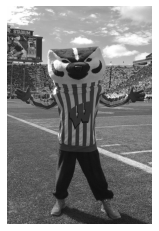

In [2]:
# Display image
fig = plt.figure()
ax = fig.add_subplot(111)

ax.imshow(A,cmap='gray')
ax.set_axis_off()
plt.show()

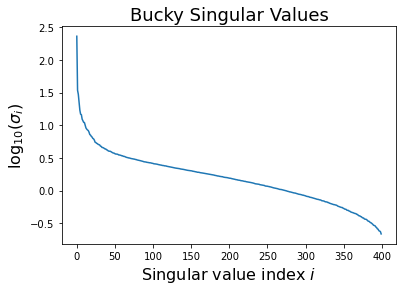

In [3]:
# Bucky's singular values

# Complete and uncomment line below
U,s,VT = np.linalg.svd(A)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(np.log10(s))
ax.set_xlabel('Singular value index $i$', fontsize=16)
ax.set_ylabel('$\log_{10}(\sigma_i)$', fontsize=16)
ax.set_title('Bucky Singular Values', fontsize=18)
plt.show()

Q2 a) The approximate rank of A is 400 as s is a diagonal matrix with nearly 400 features as is seen from the graph above. Log is useful here as the first few singular values are clearly much larger than the ones that come after and as such, it would be difficult to plot them on a graph. 

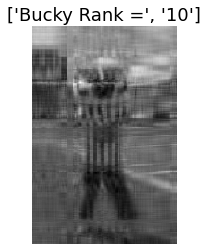

Rank  10 approximation size:  10100


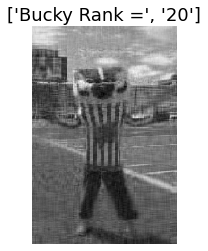

Rank  20 approximation size:  20400


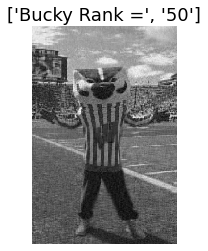

Rank  50 approximation size:  52500


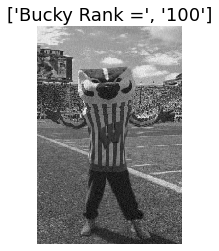

Rank  100 approximation size:  110000
Norm error: [0.20435519 0.17175359 0.13413041 0.09988287]


<ipython-input-4-806b14876249>:31: UserWarning: In Matplotlib 3.3 individual lines on a stem plot will be added as a LineCollection instead of individual lines. This significantly improves the performance of a stem plot. To remove this warning and switch to the new behaviour, set the "use_line_collection" keyword argument to True.
  ax.stem(r_vals,norm_err)


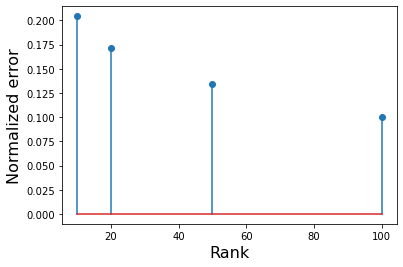

In [4]:
# Find and display low-rank approximations

r_vals = np.array([10, 20, 50, 100 ])
err_fro = np.zeros(len(r_vals))

# display images of various rank approximations
for i, r in enumerate(r_vals):
   
    # Complete and uncomment two lines below
    Ur = U[:,:r]
    sr = np.diag(s[0:r])
    VTr = VT[:r]
    Ar = Ur@sr@VTr 
    Er = A-Ar 
    err_fro[i] = np.linalg.norm(Er,ord='fro')
    
    fig = plt.figure()
    ax = fig.add_subplot(111)
    ax.imshow(Ar,cmap='gray',interpolation='none')
    ax.set_axis_off()
    ax.set_title(['Bucky Rank =', str(r_vals[i])], fontsize=18)
    plt.show()
    print("Rank ", r, "approximation size: ", len(Ur)*len(Ur[0])+len(sr)*len(sr[0])+len(VTr)*len(VTr[0]))
    
# plot normalized error versus rank
norm_err = err_fro/np.linalg.norm(A,ord='fro')
print("Norm error:", norm_err)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.stem(r_vals,norm_err)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('Normalized error', fontsize=16)
plt.show()

Q2 b) As r goes up, the approximation becomes better in quality. This is intuitive as a higher r means the matrix is closer to the original matrix and is able to catch more of it's features

Q2 c) The sizes of each of the approximations can be found below their respective images.

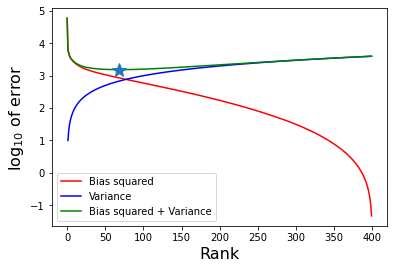

rank minimizing bias square and variance:  68


In [5]:
# bias-variance tradeoff
num_sv = min(rows, cols)
bias_2 = np.zeros(num_sv)
ranks = np.arange(num_sv)

for r in range(num_sv):
    bias_2[r] = np.linalg.norm(s[r:num_sv])**2

sigma2 = 10
var = sigma2*ranks
#print(var)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ranks,np.log10(bias_2),'r',label='Bias squared')
ax.plot(ranks[1:],np.log10(var[1:]),'b', label = 'Variance')
ax.plot(ranks,np.log10(bias_2+var),'g', label='Bias squared + Variance')
min_bias_plus_variance_index = np.argmin(np.log10(bias_2+var))
ax.plot(ranks[min_bias_plus_variance_index], np.log10(bias_2+var)[min_bias_plus_variance_index], '*', markersize=15)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('$\log_{10}$ of error', fontsize=16)
ax.legend()
plt.show()

print("rank minimizing bias square and variance: ", ranks[min_bias_plus_variance_index])

Q2 d) 1) when sigma2 = 10, rank = 68 minimizes (bias sqaure + variance)

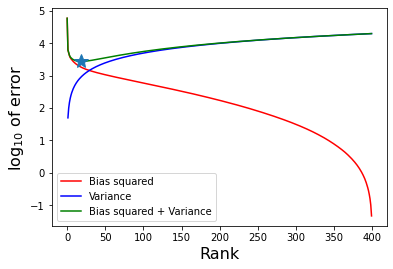

rank minimizing bias square and variance:  18


In [6]:
# bias-variance tradeoff
num_sv = min(rows, cols)
bias_2 = np.zeros(num_sv)
ranks = np.arange(num_sv)

for r in range(num_sv):
    bias_2[r] = np.linalg.norm(s[r:num_sv])**2

sigma2 = 50
var = sigma2*ranks
#print(var)

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(ranks,np.log10(bias_2),'r',label='Bias squared')
ax.plot(ranks[1:],np.log10(var[1:]),'b', label = 'Variance')
ax.plot(ranks,np.log10(bias_2+var),'g', label='Bias squared + Variance')
min_bias_plus_variance_index = np.argmin(np.log10(bias_2+var))
ax.plot(ranks[min_bias_plus_variance_index], np.log10(bias_2+var)[min_bias_plus_variance_index], '*', markersize=15)
ax.set_xlabel('Rank', fontsize=16)
ax.set_ylabel('$\log_{10}$ of error', fontsize=16)
ax.legend()
plt.show()

print("rank minimizing bias square and variance: ", ranks[min_bias_plus_variance_index])

Q2 d) 2) when sigma2 = 50, rank = 18 minimizes (bias sqaure + variance)